In [32]:
from notebooks.presets import set_cwd
set_cwd()
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt
import numpy as np
import cv2

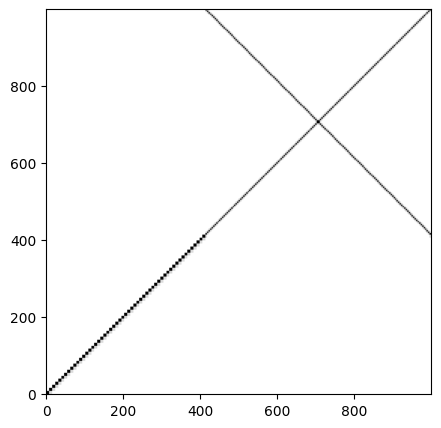

{'m00': 7832.0, 'm10': 3917091.999999998, 'm01': 3911504.0, 'm20': 2611429249.7142854, 'm11': 2477345611.285715, 'm02': 2606738347.0000005, 'm30': 1958490545491.4285, 'm21': 1770744450939.857, 'm12': 1769586596608.3577, 'm03': 1954189905475.357, 'mu20': 652337097.4589245, 'mu11': 521048238.153949, 'mu02': 653231766.0480087, 'mu30': -107191247.71459961, 'mu21': -54664605054.56067, 'mu12': -54596046470.18768, 'mu03': -164640348.390625, 'nu20': 10.63473614734313, 'nu11': 8.494397381951996, 'nu02': 10.649321496576354, 'nu30': -0.019745931641076367, 'nu21': -10.069885159539721, 'nu12': -10.057255834391437, 'nu03': -0.030328754763076525}
[ 2.12840576e+01  2.88619360e+02  1.81993617e+03  2.03560286e+02
  1.23898014e+05  3.45824159e+03 -4.83678803e+02]


In [33]:
example_path = "data/simple/parabolas_0/0.npy"

a = np.load(example_path)
mtf = MarkovTransitionField(n_bins=128)
a_new0 = mtf.fit_transform(a.reshape(1, -1))
plt.figure(figsize=(5, 5))
plt.imshow(a_new0[0], cmap="binary", origin="lower")
plt.show()

m = cv2.moments(a_new0[0])
hu = cv2.HuMoments(m).flatten()

print(m)
print(hu)

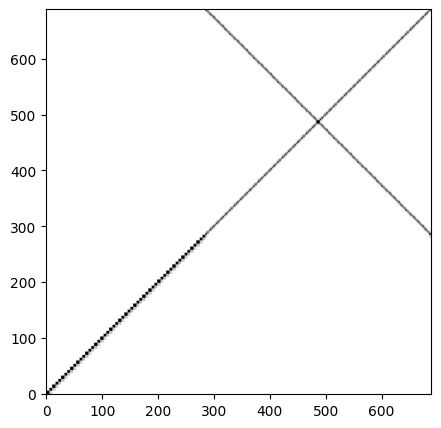

{'m00': 3738.7999999999997, 'm10': 1288980.4000000001, 'm01': 1286250.9000000004, 'm20': 592183354.4, 'm11': 561562092.2, 'm02': 590571996.9000001, 'm30': 306032211088.0001, 'm21': 276637512947.4001, 'm12': 276361179020.86676, 'm03': 305003683123.1, 'mu20': 147797329.0485074, 'mu11': 118117083.21787721, 'mu02': 148066011.62375873, 'mu30': -36168514.97601318, 'mu21': -8533553412.94133, 'mu12': -8514218962.898064, 'mu03': -47093582.892089844, 'nu20': 10.573094592375558, 'nu11': 8.449835337878344, 'nu02': 10.592315550573815, 'nu30': -0.04231555999565063, 'nu21': -9.983879395128318, 'nu12': -9.961258945233393, 'nu03': -0.055097405398092374}
[ 2.11654101e+01  2.85599238e+02  1.78431596e+03  2.00852558e+02
  1.20238494e+05  3.39433454e+03 -7.48023210e+02]


In [34]:
example_path = "data/simple/parabolas_0/1.npy"

a = np.load(example_path)
mtf = MarkovTransitionField(n_bins=128)
a_new1 = mtf.fit_transform(a.reshape(1, -1))
plt.figure(figsize=(5, 5))
plt.imshow(a_new1[0], cmap="binary", origin="lower")
plt.show()

m = cv2.moments(a_new1[0])
hu = cv2.HuMoments(m).flatten()

print(m)
print(hu)

original shapes: (1, 1000, 1000) (1, 689, 689)
resized shapes: (1000, 1000) (1000, 1000)


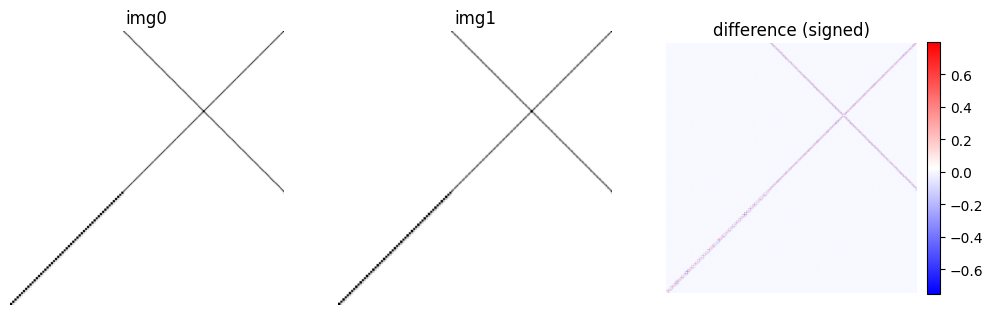

diff stats: min, max, mean, mean(abs): -0.75124997 0.7962 -4.3908556e-05 0.0030685787


In [35]:
# Resize both MTF images to the same size with cv2 and compute their difference
print("original shapes:", a_new0.shape, a_new1.shape)

# choose a target size (max of heights and widths)
h0, w0 = a_new0[0].shape
h1, w1 = a_new1[0].shape
target_h = max(h0, h1)
target_w = max(w0, w1)

# resize (cv2.resize takes (width, height))
img0 = cv2.resize(a_new0[0].astype('float32'), (target_w, target_h), interpolation=cv2.INTER_LINEAR)
img1 = cv2.resize(a_new1[0].astype('float32'), (target_w, target_h), interpolation=cv2.INTER_LINEAR)

print("resized shapes:", img0.shape, img1.shape)

# compute signed difference and absolute difference
diff = img0 - img1
abs_diff = np.abs(diff)

# visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img0, cmap='binary', origin='lower'); plt.title('img0'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(img1, cmap='binary', origin='lower'); plt.title('img1'); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(diff, cmap='bwr', origin='lower'); plt.title('difference (signed)'); plt.colorbar(fraction=0.046, pad=0.04); plt.axis('off')
plt.show()

print("diff stats: min, max, mean, mean(abs):", diff.min(), diff.max(), diff.mean(), abs_diff.mean())